Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimized Decision Tree RMSE: 8553.7018
Optimized Decision Tree R^2: 0.8069


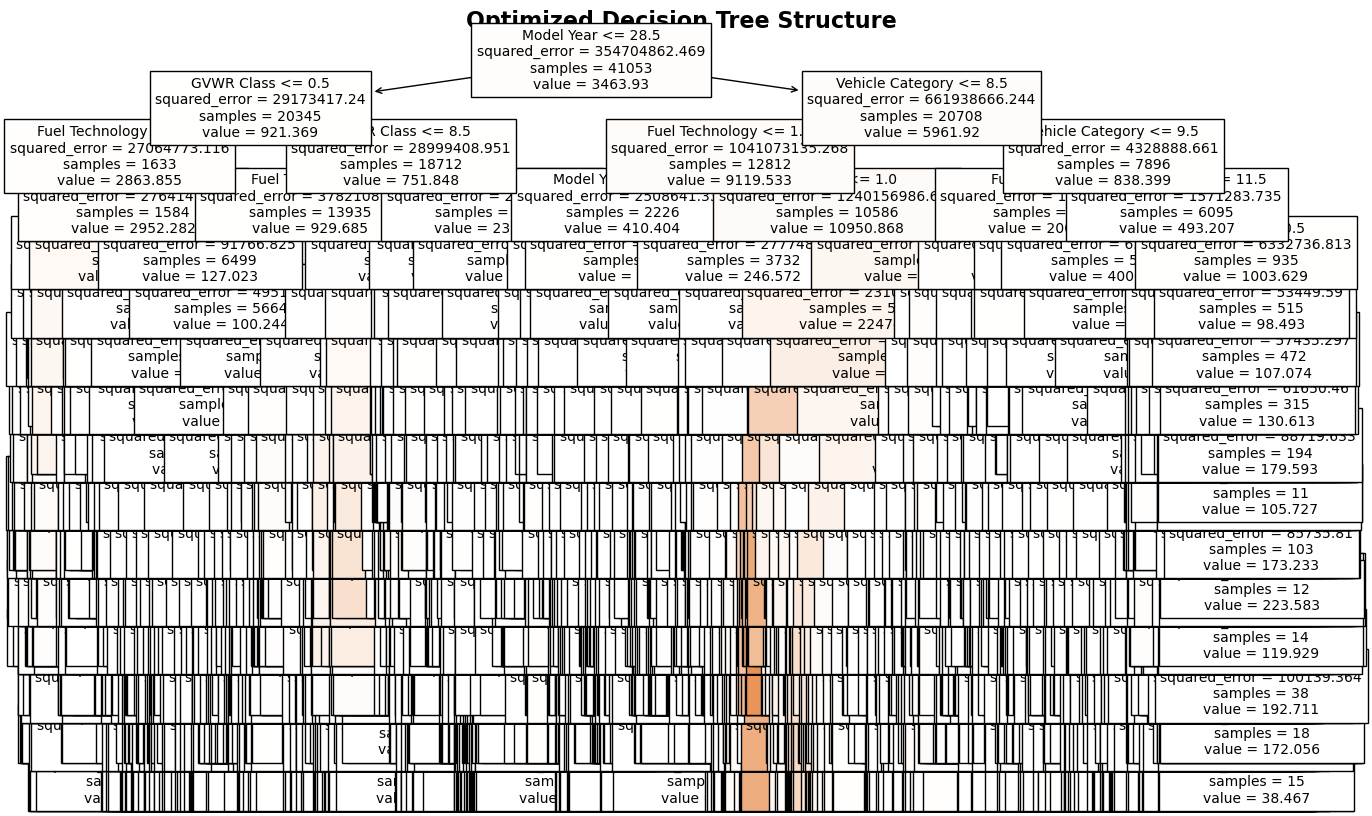

In [12]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_excel(r'C:\Users\HP\Downloads\training.xlsx', sheet_name='Sheet1')
scoring_data = pd.read_excel(r'C:\Users\HP\Downloads\scoring.xlsx', sheet_name='Sheet1')

features = ['Vehicle Category', 'GVWR Class', 'Fuel Type', 'Model Year', 'Fuel Technology']
target = 'Vehicle Population'

def clean_column(data, column_name):
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].fillna('Unknown')

label_encoder = LabelEncoder()
for col in features:
    clean_column(train_data, col)
    clean_column(scoring_data, col)
    train_data[col] = label_encoder.fit_transform(train_data[col])
    scoring_data[col] = label_encoder.transform(scoring_data[col])

X_train = train_data[features]
y_train = train_data[target]
X_test = scoring_data[features]
y_test = scoring_data[target]

dt_model = DecisionTreeRegressor(random_state=42)

param_distributions = {
    'max_depth': [None, 5, 10, 15, 20, 25],  # limit depth more aggressively
    'min_samples_split': [2, 5, 10],  # increase min samples for splits
    'min_samples_leaf': [1, 2, 4, 8],  # higher min samples for leaves
    'max_features': [None, 'sqrt', 'log2'],  # try different max features strategies
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']  # test multiple criteria
}

randomized_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_distributions, n_iter=10, cv=3, n_jobs=-1, random_state=42, verbose=2, scoring='neg_mean_squared_error')
randomized_search.fit(X_train, y_train)

best_dt_model = randomized_search.best_estimator_

y_pred = best_dt_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Optimized Decision Tree RMSE: {rmse:.4f}")
print(f"Optimized Decision Tree R^2: {r2:.4f}")

plt.figure(figsize=(15, 10))
plot_tree(best_dt_model, filled=True, feature_names=features, fontsize=10)
plt.title("Optimized Decision Tree Structure", fontsize=16, weight='bold')
plt.show()